Number of samples:  112800
Mean: 0.1751
Standard Deviation: 0.3332

Histogram:
Bin 1: 0.00 to 0.02: 62814313 pixels
Bin 2: 0.02 to 0.04: 1473992 pixels
Bin 3: 0.04 to 0.06: 202813 pixels
Bin 4: 0.06 to 0.08: 572780 pixels
Bin 5: 0.08 to 0.10: 822840 pixels
Bin 6: 0.10 to 0.12: 98348 pixels
Bin 7: 0.12 to 0.14: 1136711 pixels
Bin 8: 0.14 to 0.16: 1193414 pixels
Bin 9: 0.16 to 0.18: 124329 pixels
Bin 10: 0.18 to 0.20: 577717 pixels
Bin 11: 0.20 to 0.22: 306286 pixels
Bin 12: 0.22 to 0.24: 61622 pixels
Bin 13: 0.24 to 0.26: 164912 pixels
Bin 14: 0.26 to 0.28: 122020 pixels
Bin 15: 0.28 to 0.30: 61487 pixels
Bin 16: 0.30 to 0.32: 489692 pixels
Bin 17: 0.32 to 0.34: 525195 pixels
Bin 18: 0.34 to 0.36: 233240 pixels
Bin 19: 0.36 to 0.38: 295694 pixels
Bin 20: 0.38 to 0.40: 96887 pixels
Bin 21: 0.40 to 0.42: 49944 pixels
Bin 22: 0.42 to 0.44: 168450 pixels
Bin 23: 0.44 to 0.46: 533386 pixels
Bin 24: 0.46 to 0.48: 83661 pixels
Bin 25: 0.48 to 0.50: 1211401 pixels
Bin 26: 0.50 to 0.52: 391353 p

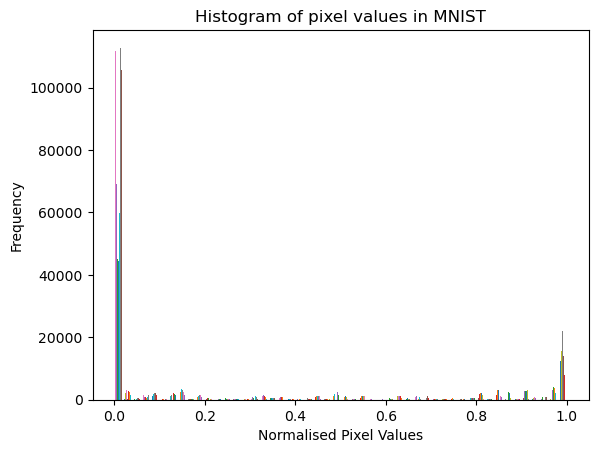

In [1]:
# For calculating EMNIST statistics. Useful for normalisation in training runs, to accelerate convergence

# package imports
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms # for notational ease
from torch.utils.data import DataLoader, TensorDataset # Could also use a pandas DataLoader?
import matplotlib.pyplot as plt
import numpy as np
import math

# Parameters relevant for histogram creation
bin_count = 50 # number of bins. Note that most pixel values are very near 0 or 1, but anti-aliasing also places credence elsewhere

# Load MNIST dataset
transform = transforms.ToTensor() # converts the original numpy array to a pytorch tensor for later processing
#train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_dataset = torchvision.datasets.EMNIST(root='./data', split='balanced', train=True, download=True, transform=transform) # separate download each time

# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset)) # torch.utils.data.DataLoader

# Technically puts all images into one batch. In reality, disregards the batch size entirely. Only suitable for non-learning manipulations
images, _ = next(iter(train_loader))

# Reshape the images to (num_images, num_pixels)
images = images.view(images.size(0), -1).numpy()

# Calculate statistics about pixel values
mean = np.mean(images)
std = np.std(images)
# Printing these statistics
print(f'Number of samples: ', len(train_dataset))
print(f"Mean: {mean:.4f}")
print(f"Standard Deviation: {std:.4f}")

# Calculate histogram
hist, bin_edges = np.histogram(images, bins=bin_count, range=(0, 1))

print("\nHistogram:")
for i, (count, edge) in enumerate(zip(hist, bin_edges[:-1])):
    print(f"Bin {i+1}: {edge:.2f} to {bin_edges[i+1]:.2f}: {count} pixels")

plt.hist(images, bins=bin_count)
plt.xlabel('Normalised Pixel Values') # normalised between 0 and 1
plt.ylabel('Frequency')
plt.title('Histogram of pixel values in EMNIST')
plt.show()